In [1]:
# https://github.com/MicrosoftDocs/pytorchfundamentals/blob/main/computer-vision-pytorch/pytorchcv.py
!wget https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py

# torchinfo: https://github.com/TylerYep/torchinfo
!pip install torchinfo

--2021-07-18 08:17:43--  https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6371 (6.2K) [text/plain]
Saving to: ‘pytorchcv.py’

pytorchcv.py        100%[===================>]   6.22K  --.-KB/s    in 0s      

2021-07-18 08:17:44 (70.1 MB/s) - ‘pytorchcv.py’ saved [6371/6371]



In [2]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from torchinfo import summary
import os

from pytorchcv import train, display_dataset, train_long, load_cats_dogs_dataset, validate, common_transform

In [3]:
if not os.path.exists("data/kagglecatsanddogs_3367a.zip"):
    !wget -P data -q https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

dataset, train_loader, test_loader = load_cats_dogs_dataset()

# waht load_cats_dogs_dataset does is:
#
# from PIL import Image
# import glob
# import zipfile
# 
# def check_image(fn):
#     try:
#         im = Image.open(fn)
#         im.verify()
#         return True
#     except:
#         return False
# 
# def check_image_dir(path):
#     for fn in glob.glob(path):
#         if not check_image(fn):
#             print("Corrupt image: {}".format(fn))
#             os.remove(fn)
# 
# def load_cats_dogs_dataset():
#     if not os.path.exists('data/PetImages'):
#         with zipfile.ZipFile('data/kagglecatsanddogs_3367a.zip', 'r') as zip_ref:
#             zip_ref.extractall('data')
#
#     check_image_dir('data/PetImages/Cat/*.jpg')
#     check_image_dir('data/PetImages/Dog/*.jpg')
#
#     dataset = torchvision.datasets.ImageFolder('data/PetImages',transform=common_transform())
#     trainset, testset = torch.utils.data.random_split(dataset,[20000,len(dataset)-20000])
#     trainloader = torch.utils.data.DataLoader(trainset,batch_size=32)
#     testloader = torch.utils.data.DataLoader(trainset,batch_size=32)
#     return dataset, trainloader, testloader

Corrupt image: data/PetImages/Cat/666.jpg
Corrupt image: data/PetImages/Dog/11702.jpg


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

In [4]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=r'.*EXIF.*') 

In [6]:
# FIXME: "HTTPError: HTTP Error 403: rate limit exceeded" raised by torch.hub.load
    # Temporary Fix: delete line 162 on torch/hub.py ("_validate_not_a_forked_repo(repo_owner, repo_name, branch)")
    # Ref: https://github.com/pytorch/vision/issues/4156#issuecomment-881201604
import importlib
importlib.reload(torch.hub)  # don't forget to re-import torch.hub again after modifying the torch/hub.py (if importlib.reload(torch), only torch.py will be reload, not torch/hub.py)

model = torch.hub.load(repo_or_dir="pytorch/vision:v0.6.0", model="mobilenet_v2", pretrained=True)  # Load a model from a github repo or a local directory
model.eval()
print(model)
print(summary(model, depth=5))  # depth(int): Depth of nested layers to display; Default: 3

Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to /root/.cache/torch/hub/v0.6.0.zip
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth



MobileNetV2(
  (features): Sequential(
    (0): ConvBNActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, mome

In [7]:
sample_image = dataset[0][0].unsqueeze(dim=0)  # unsqueeze: Returns a new tensor with a dimension of size one inserted at the specified position. Here, as a fake batch dimension.
print(f"image shape: {sample_image.size()}")
res = model(sample_image)
print(res[0].argmax())  # res[0]: first sample in batch, that is the sample_image

image shape: torch.Size([1, 3, 224, 224])
tensor(281)


In [8]:
# Exercise: Compare the number of parameters in MobileNet and full-scale ResNet model.
# params: 3,504,872 (MobileNet v2) v.s. 11,689,512 (ResNet 18)

In [9]:
for x in model.parameters():
    x.requires_grad = False

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.classifier = nn.Linear(1280, 2)  # parameters in nn.Module: requires_grad
model = model.to(device)
summary(model, input_size=(1, 3, 244, 244))

Layer (type:depth-idx)                        Output Shape              Param #
MobileNetV2                                   --                        --
├─Sequential: 1-1                             [1, 1280, 8, 8]           --
│    └─ConvBNActivation: 2-1                  [1, 32, 122, 122]         --
│    │    └─Conv2d: 3-1                       [1, 32, 122, 122]         (864)
│    │    └─BatchNorm2d: 3-2                  [1, 32, 122, 122]         (64)
│    │    └─ReLU6: 3-3                        [1, 32, 122, 122]         --
│    └─InvertedResidual: 2-2                  [1, 16, 122, 122]         --
│    │    └─Sequential: 3-4                   [1, 16, 122, 122]         (896)
│    └─InvertedResidual: 2-3                  [1, 24, 61, 61]           --
│    │    └─Sequential: 3-5                   [1, 24, 61, 61]           (5,136)
│    └─InvertedResidual: 2-4                  [1, 24, 61, 61]           --
│    │    └─Sequential: 3-6                   [1, 24, 61, 61]           (8,832)
│ 

In [11]:
train_long(model, train_loader, test_loader, loss_fn=torch.nn.CrossEntropyLoss(), epochs=1, print_freq=90)  # already has model.train() in it

Epoch 0, minibatch 0: train acc = 0.40625, train loss = 0.027358591556549072
Epoch 0, minibatch 90: train acc = 0.9151785714285714, train loss = 0.009444329764816788
Epoch 0, minibatch 180: train acc = 0.9343922651933702, train loss = 0.007436754295180516
Epoch 0, minibatch 270: train acc = 0.9413053505535055, train loss = 0.006595732980988562
Epoch 0, minibatch 360: train acc = 0.943213296398892, train loss = 0.006565946621247606
Epoch 0, minibatch 450: train acc = 0.948309312638581, train loss = 0.00601351340435561
Epoch 0, minibatch 540: train acc = 0.9499191312384473, train loss = 0.006015318378723483
Epoch 0 done, validation acc = 0.97975, validation loss = 0.00236225643157959


Epoch 0, minibatch 0: train acc = 0.46875, train loss = 0.022360822185873985
Epoch 0 done, validation acc = 0.5022, validation loss = 0.1364993896484375
Epoch 0, minibatch 90: train acc = 0.929945054945055, train loss = 0.006828431899730976
Epoch 0 done, validation acc = 0.9754, validation loss = 0.00212592716217041
Epoch 0, minibatch 180: train acc = 0.9507941988950276, train loss = 0.004775377926905511
Epoch 0 done, validation acc = 0.97525, validation loss = 0.0019870790481567382
Epoch 0, minibatch 270: train acc = 0.953989852398524, train loss = 0.004369997010459759
Epoch 0 done, validation acc = 0.9699, validation loss = 0.0031969675064086912
Epoch 0, minibatch 360: train acc = 0.9562846260387812, train loss = 0.0044226256764166244
Epoch 0 done, validation acc = 0.9679, validation loss = 0.004109271621704102
Epoch 0, minibatch 450: train acc = 0.95904933481153, train loss = 0.004265004409654706
Epoch 0 done, validation acc = 0.9807, validation loss = 0.00212886962890625
Epoch 0, m

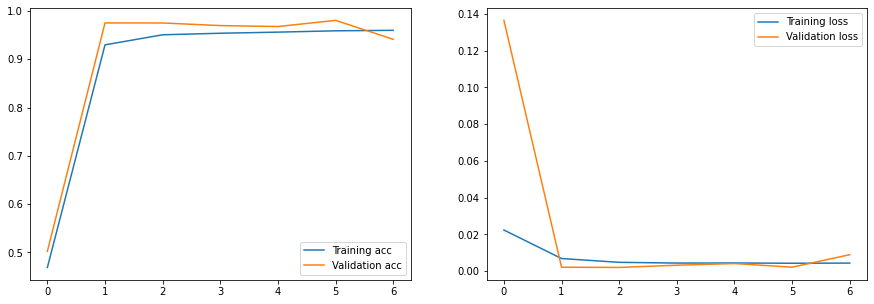

In [14]:
from pytorchcv import plot_results

def train_long(net,train_loader,test_loader,epochs=5,lr=0.01,optimizer=None,loss_fn = nn.NLLLoss(),print_freq=10):
    optimizer = optimizer or torch.optim.Adam(net.parameters(),lr=lr)
    res = { 'train_loss' : [], 'train_acc': [], 'val_loss': [], 'val_acc': []}  # add res to record history
    for epoch in range(epochs):
        net.train()
        total_loss,acc,count = 0,0,0
        for i, (features,labels) in enumerate(train_loader):
            lbls = labels.to(device)
            optimizer.zero_grad()
            out = net(features.to(device))
            loss = loss_fn(out,lbls)
            loss.backward()
            optimizer.step()
            total_loss+=loss
            _,predicted = torch.max(out,1)
            acc+=(predicted==lbls).sum()
            count+=len(labels)
            if i%print_freq==0:
                print("Epoch {}, minibatch {}: train acc = {}, train loss = {}".format(epoch,i,acc.item()/count,total_loss.item()/count))
                vl,va = validate(net,test_loader,loss_fn)  # validate every print_freq
                print("Epoch {} done, validation acc = {}, validation loss = {}".format(epoch,va,vl))  # validate every print_freq
                res['train_loss'].append(total_loss.item()/count)  # add res to record history
                res['train_acc'].append(acc.item()/count)  # add res to record history
                res['val_loss'].append(vl)  # add res to record history
                res['val_acc'].append(va)  # add res to record history
    return res

model.classifier = nn.Linear(1280, 2).to(device)  # reset classifier param

hist = train_long(model, train_loader, test_loader, loss_fn=torch.nn.CrossEntropyLoss(), epochs=1, print_freq=90)

plot_results(hist)